# **Default Of Credit Card Clients**

**Description of the project**

**X1:**
Amount of the given credit (NT dollar): it includes
both the individual consumer credit and his/her family
(supplementary) credit.

**X2:**
Gender (1 = male; 2 = female).

**X3:**
Education (1 = graduate school; 2 = university;
3 = high school; 0, 4, 5, 6 = others).

**X4:**
Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

**X5:**
Age (year).

**X6–X11:**
History of past payment. We tracked the past
monthly payment records (from April to September,2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August,2005;...;X11 = the repayment status in April, 2005.
The measurement scale for the repayment status is:
-2: No consumption
-1: Paid in full
0: The use of revolving credit
1 = payment delay for one month
2 = payment delay for two months
 . . .
8 = payment delay for eight months;
9 = payment delay for nine months and above.

**X12–X17:**
Amount of bill statement (NT dollar).
X12 = amount of bill statement in September, 2005;
X13 = amount of bill statement in August,
2005;...;X17 = amount of bill statement in April, 2005.

**X18–X23:** Amount of previous payment (NT dollar).
X18 = amount paid in September, 2005; X19 = amount
paid in August, 2005;...;X23 = amount paid in April,
2005.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn import preprocessing
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'tensorflow.keras'

In [3]:
df=pd.read_excel(r'C:\Users\Yosr AROUI\Downloads\default of credit card clients.xls ',header=1)
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [ ]:
prof = ProfileReport(df)
prof

# I- Visualisation et Preprocessing 

# ***1) Valeurs nulles et dupliquées***

**Nous pouvons remarquer que nous n'avons pas de valeurs nulles dans notre Data Set**

In [60]:
df.isnull().sum().sum()

0

**Afficher le nombre de lignes dupliquées**

In [61]:
len(df[df.duplicated()] )

0

In [62]:
# Suppression des observations dupliquées
df.drop_duplicates(inplace = True )
len(df)

30000

In [63]:
# Dataframe des individus ayant tous les Bill statements nulles durant toute la période.
index1 = df.iloc[: ,11 : 17 ][(df.iloc[: ,11 : 17 ] == 0 )  ].dropna().index
df1 = df.loc[index1]

In [64]:
# Dataframe des individus ayant tous les PAY amounts nulles durant toute la période.

index2 = df.iloc[: , 17 : 23] [df.iloc[: ,17 : 23 ] == 0 ].dropna().index
df2 = df.loc[index2]

In [65]:
# Dataframe des individus ayant tous les PAY amounts et Bill statements nulles  durant toute la période.
index3= np.intersect1d(index1,index2)
df3 = df.loc[index3]

In [66]:
# Indices des clients sans consommation durant toute la période
ind1 = df.iloc[ :  ,5: 11] [df.iloc[ :  ,5: 11] == -2 ].dropna(axis = 0).index

In [67]:
# Dataframe des individus ayant tous les PAY amounts nulles durant toute la période.
ind2 = df.iloc[ :  ,17: 23] [df.iloc[ :  ,17: 23] == 0 ].dropna(axis = 0).index

In [68]:
# Dataframe des individus ayant tous les PAY amounts nulles et qui n'ont rien consommé durant toute la période.
ind3 = np.intersect1d(ind1,ind2)
df.loc[ind3]

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

In [69]:
#Afficher la tailles des deux intersections
ind4 = np.union1d(index3,ind3)
len(ind4)

0

In [70]:
# Dataframe des individus inactifs
df3 = df.loc[ind4]
df3

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default payment next month]
Index: []

[0 rows x 25 columns]

In [71]:
# Suppression des individus inactifs de la base de donnée

df.drop(df3.index , axis = 0 , inplace =True)
df.shape  

(30000, 25)

In [72]:
df["default payment next month"].var()

0.17227630254344614

# ***II. Data understanding***
**Déterminer précisément les données à analyser, à identifier la qualité des données disponibles.¶**

# ***2) Etude de l'équilibre de la DataSet***

**Pour notre DataSet, nous avons comme Target la colonne "Default Payment Next Month". Cette colonne renseigne sur l'éventualité de payer ou non les crédits passés par certains clients**

**En effet, nous pouvons remarquer que nous avons beaucoup plus de 0 que de 1. Donc, la DataSet est deséquilibrée. (70% pour 0)**

In [74]:
df["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [75]:
temp = df["default payment next month"].value_counts()

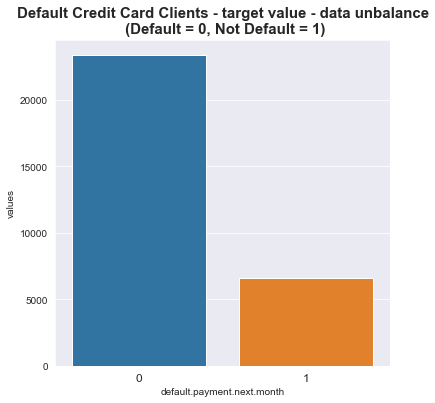

In [76]:
df = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)',fontsize = 15 ,fontweight = "bold")
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y="values", data=df)
locs, labels = plt.xticks(fontsize = 12)
plt.show()

# ***3) Etude statistique des variables (Catégoriques et numériques)***

# **Variables Numériques**


**Nos variables numériques sont les suivantes:**

**Amount of the given credit**


**Amount of Bill Statement** (for every month from April to September)


**Amount of previous payment** (for every month from April to September)

**Age**





In [77]:
numerical_features = ["LIMIT_BAL" ,"AGE" ,  "BILL_AMT1" , "BILL_AMT2" , "BILL_AMT3" , "BILL_AMT4" , "BILL_AMT5" ,"BILL_AMT6",
                      "PAY0" , "PAY_AMT2" , "PAY_AMT3" ,"PAY_AMT4" ,"PAY_AMT5" , "PAY_AMT6"]

**Afficher les histogrammes des features numériques en fonction de leurs densités**

KeyError: 'LIMIT_BAL'

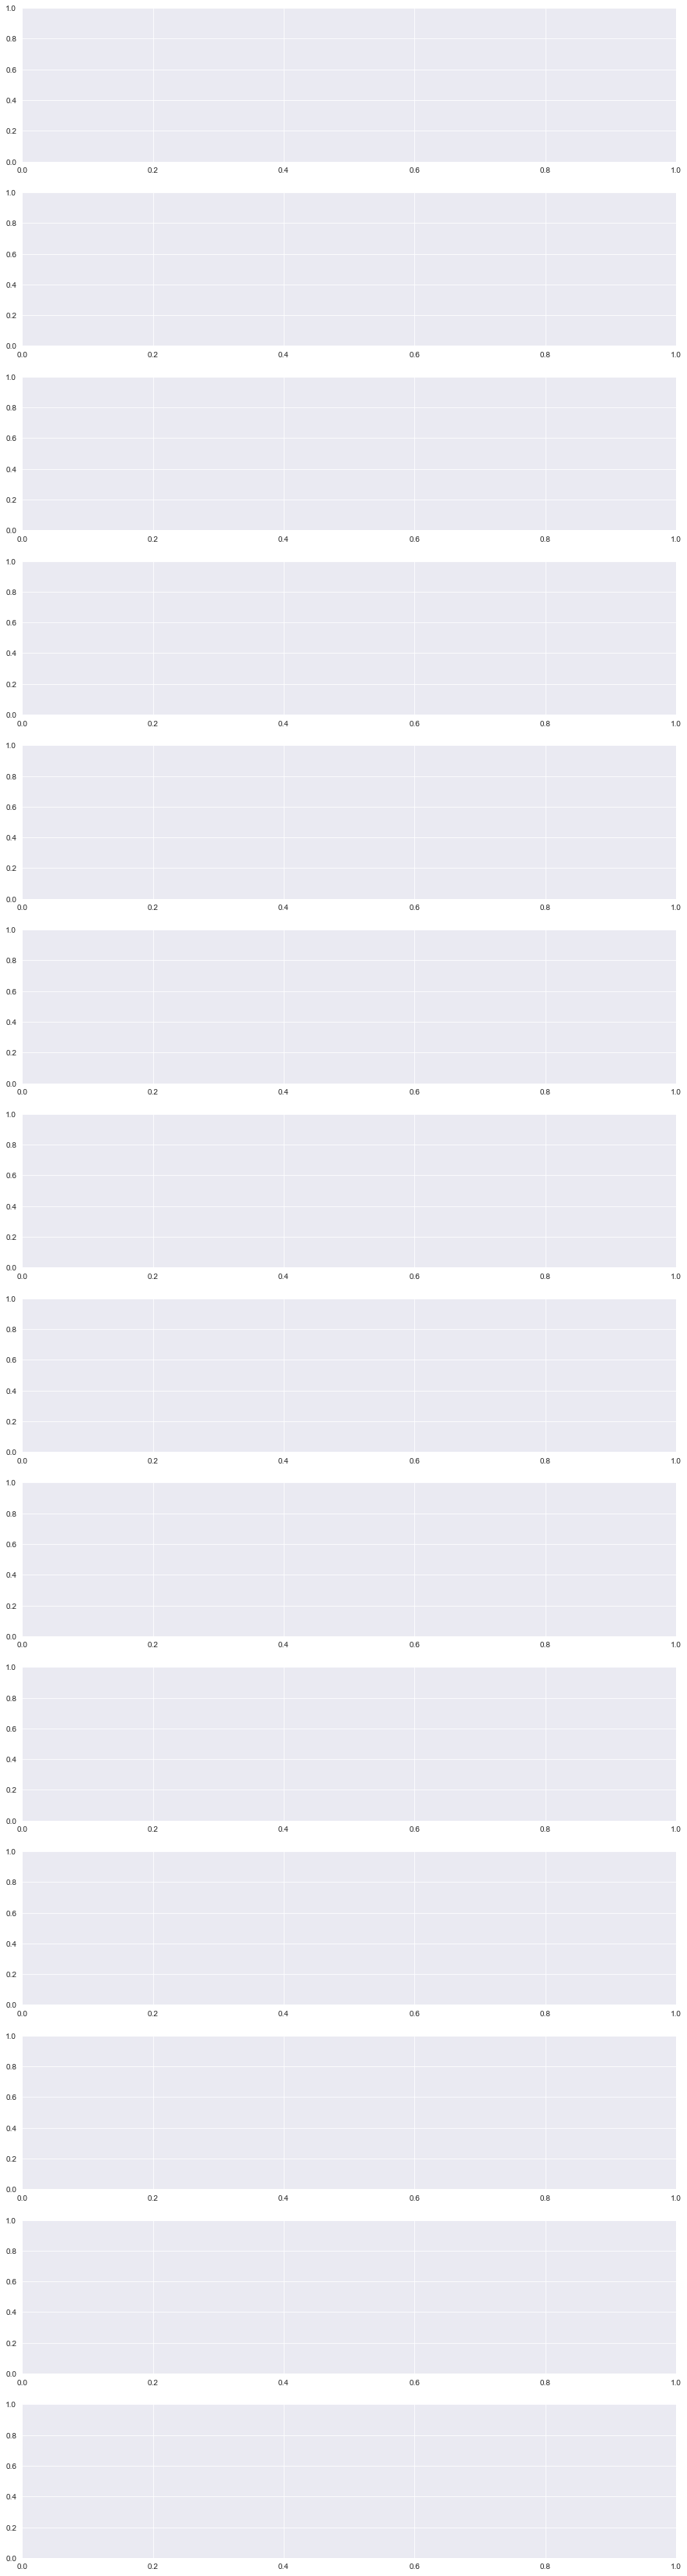

In [79]:
fig , ax = plt.subplots(figsize=(15, 60),
                       nrows = len(numerical_features))
for i in range(0,len(ax)):
    ax[i].hist(df[numerical_features[i]] ,bins = 200 ,)
    ax[i].set(xlabel = numerical_features[i])

# **Variables Catégoriques**

**Gender**

1 = male; 2 = female

**Education**

1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others

**Marital Status**

1 = married; 2 = single; 3 = divorce; 0=others

**History of past payments** 

-2: No consumption 

-1: Paid in full 

0: The use of revolving credit 

1 = payment delay for one month 

2 = payment delay for two months . . . 

8 = payment delay for eight months; 

9 = payment delay for nine months and above.

In [81]:
categorical_features = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default payment next month']]

KeyError: "None of [Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',\n       'PAY_5', 'PAY_6', 'default payment next month'],\n      dtype='object')] are in the [columns]"

**Afficher les valeurs possibles dans chaque colonne de type catégorique**

In [50]:
for col in categorical_features:
    print(f'{col :.<40} {df[col].unique()}')

SEX..................................... [2 1]
EDUCATION............................... [2 1 3 5 4 6 0]
MARRIAGE................................ [1 2 3 0]
PAY_0................................... [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2................................... [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3................................... [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4................................... [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5................................... [-2  0 -1  2  3  5  4  7  8  6]
PAY_6................................... [-2  2  0 -1  3  6  4  7  8  5]
default payment next month.............. [1 0]


**Afficher la distribution de chaque colonne de type catégorique dans un diagramme de type pie**

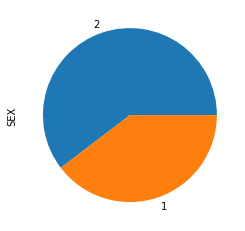

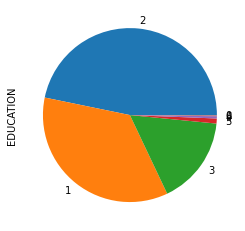

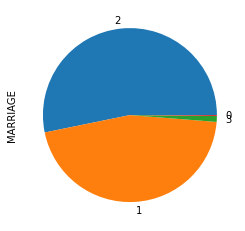

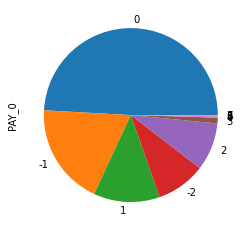

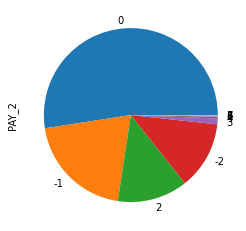

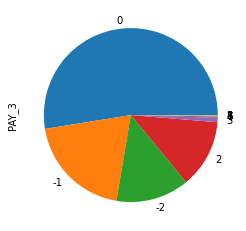

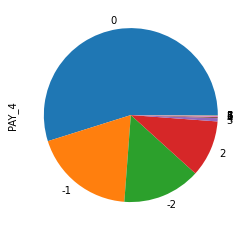

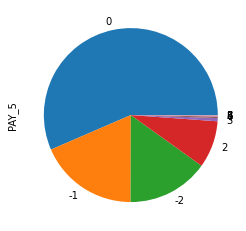

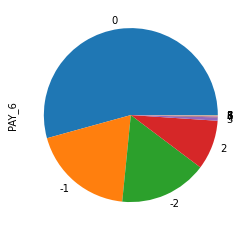

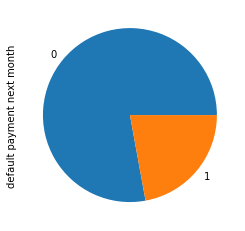

In [51]:
for col in categorical_features:
    plt.figure()
    df[col].value_counts().plot.pie()
    

**On va maintenant afficher des histogrammes qui décrivent le statut de paiement en fonction des features catégoriques**

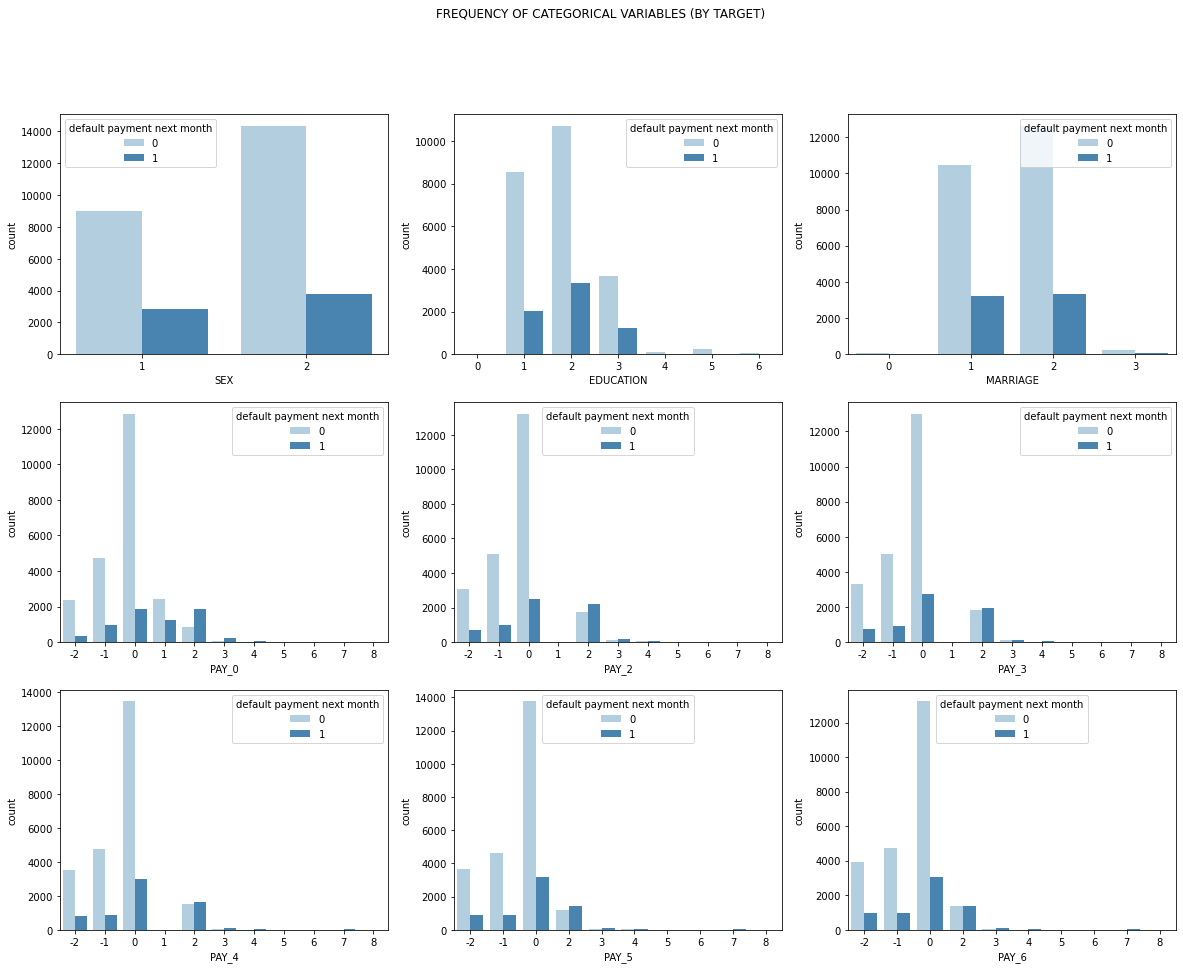

In [55]:
f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=categorical_features, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=categorical_features, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,2]);


**Box Plots of the Amount of Credit by the Delay of Payment Categories, Hue by Sex**

In [36]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')


sns.boxplot(x='PAY_0',y='LIMIT_BAL',data=df, hue='SEX')


plt.legend(loc=0)

ValueError: Could not interpret input 'PAY_0'

<Figure size 1008x648 with 0 Axes>

**Pie Chart of the Education**

In [56]:
 fig = px.pie(
        df,
        names=df["EDUCATION"].value_counts().index,
        values=df["EDUCATION"].value_counts(),
        labels={1 : "graduate school", 2 :"university",3 :" high school", 0: "others",4:"others" ,5:"others" ,6 : "others"},
        hole=0.4,
        title='Educational levels for the sample'
    )
 fig

 

**Pie Chart of most common types of delays of payments** 

In [57]:
fig = px.pie(df, values=df["PAY_0"].value_counts().index, names=df["PAY_0"].value_counts().index,)
fig.show()

**Default Payment for the next month with the delay of payments**

In [58]:
fig = px.pie(df, values=df["default payment next month"], names=df["PAY_0"])
fig.show()

**Afficher les matrices de corrélations entre les valeurs numériques et la colonne cible**

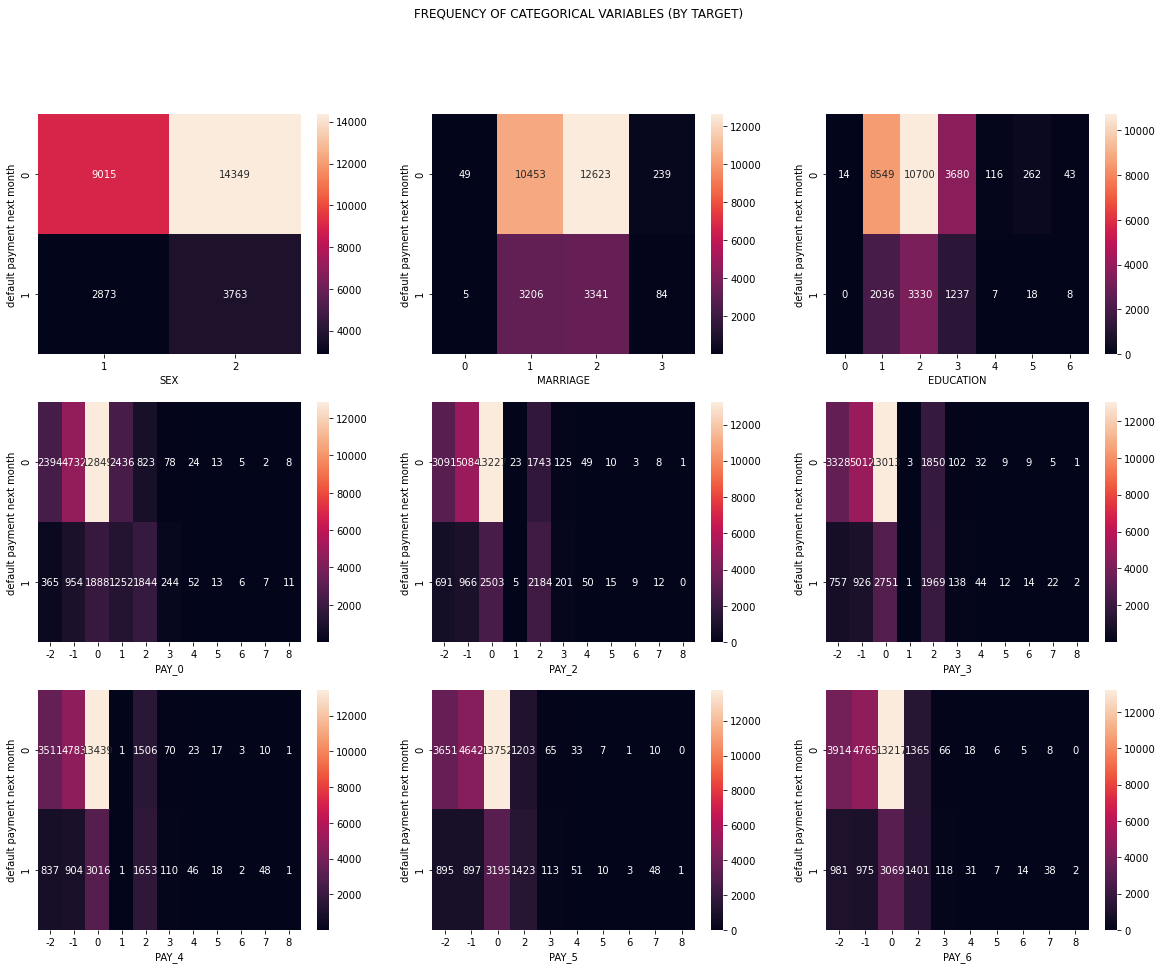

In [59]:
categorical_features = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default payment next month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['SEX']),annot=True,fmt='d',ax=axes[0,0])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['MARRIAGE']),annot=True,fmt='d',ax=axes[0,1])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['EDUCATION']),annot=True,fmt='d',ax=axes[0,2])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_0']),annot=True,fmt='d',ax=axes[1,0])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_2']),annot=True,fmt='d',ax=axes[1,1])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_3']),annot=True,fmt='d',ax=axes[1,2])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_4']),annot=True,fmt='d',ax=axes[2,0])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_5']),annot=True,fmt='d',ax=axes[2,1])
ax1 = sns.heatmap(pd.crosstab(df['default payment next month'],df['PAY_6']),annot=True,fmt='d',ax=axes[2,2])

**Afficher la matrice de corrélation générale**

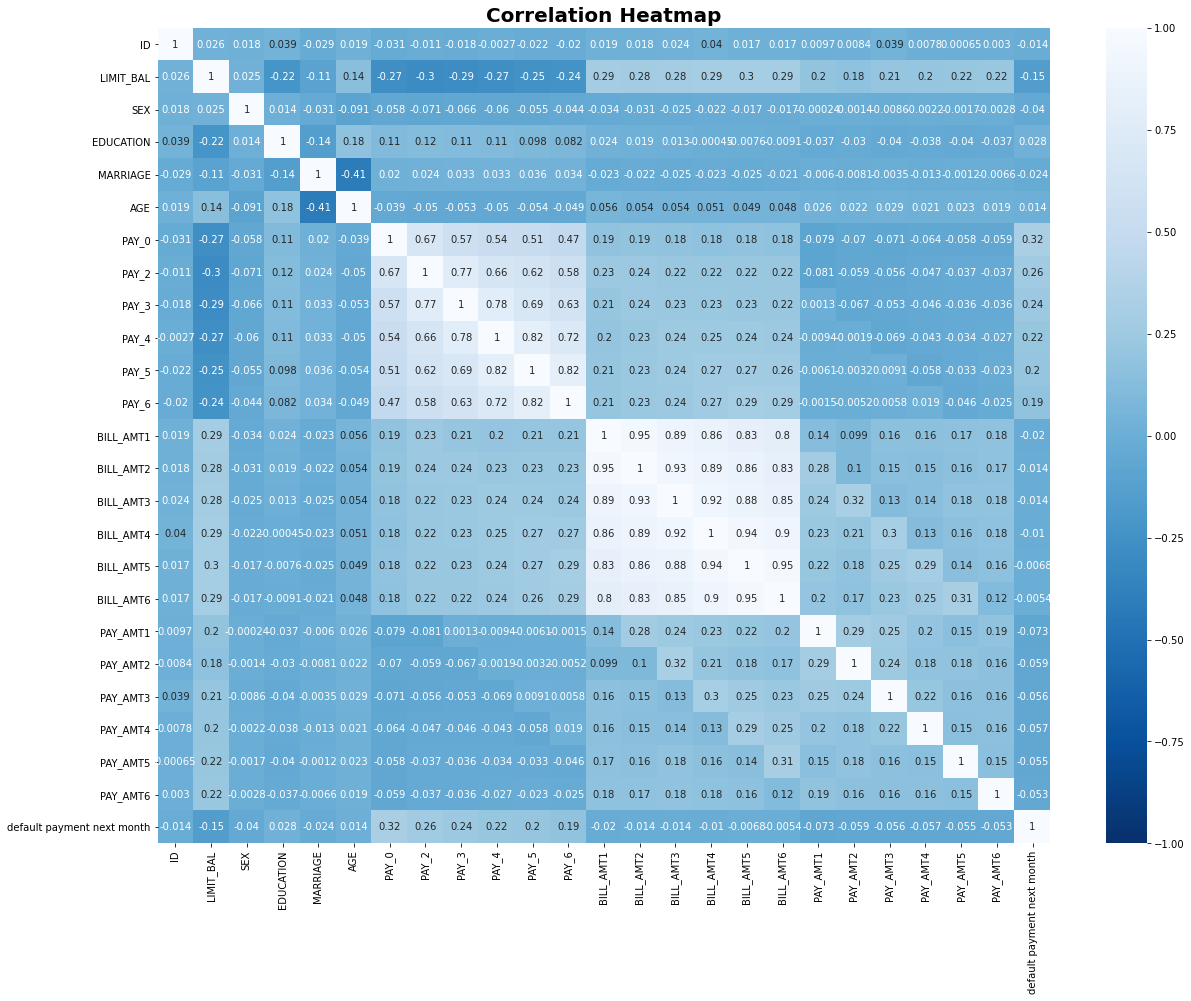

In [60]:
corr = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='Blues_r',linecolor="white")
plt.title("Correlation Heatmap" ,fontsize = 20 ,fontweight ="bold");


## **Variables Encoding**

**One Hot Encoding for Sex**

*1 = Male*

*2 = Female*

In [57]:
df['SEX']=df['SEX']-1
df

KeyError: 'SEX'

In [15]:
onehot=pd.get_dummies(df['EDUCATION'])
df=df.join(onehot, rsuffix = "_EDUCATION")


In [16]:
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    1          2         1   24      2      2     -1   
1          2     120000    1          2         2   26     -1      2      0   
2          3      90000    1          2         2   34      0      0      0   
3          4      50000    1          2         1   37      0      0      0   
4          5      50000    0          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    0          3         1   39      0      0      0   
29996  29997     150000    0          3         2   43     -1     -1     -1   
29997  29998      30000    0          2         2   37      4      3      2   
29998  29999      80000    0          3         1   41      1     -1      0   
29999  30000      50000    0          2         1   46      0      0      0   

       PAY_4  ...  PAY_AMT5  PAY_AMT6  default payment next month  0  1  2  3  \
0         -1  ...         0         0                           1  0  0  1  0   
1          0  ...         0      2000                           1  0  0  1  0   
2          0  ...      1000      5000                           0  0  0  1  0   
3          0  ...      1069      1000                           0  0  0  1  0   
4          0  ...       689       679                           0  0  0  1  0   
...      ...  ...       ...       ...                         ... .. .. .. ..   
29995      0  ...      5000      1000                           0  0  0  0  1   
29996     -1  ...         0         0                           0  0  0  0  1   
29997     -1  ...      2000      3100                           1  0  0  1  0   
29998      0  ...     52964      1804                           1  0  0  0  1   
29999      0  ...      1000      1000                           1  0  0  1  0   

       4  5  6  
0      0  0  0  
1      0  0  0  
2      0  0  0  
3      0  0  0  
4      0  0  0  
...   .. .. ..  
29995  0  0  0  
29996  0  0  0  
29997  0  0  0  
29998  0  0  0  
29999  0  0  0  

[30000 rows x 32 columns]

In [17]:
onehot=pd.get_dummies(df['MARRIAGE'])
df=df.join(onehot, rsuffix = "MARRIAGE_")
df

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    1          2         1   24      2      2     -1   
1          2     120000    1          2         2   26     -1      2      0   
2          3      90000    1          2         2   34      0      0      0   
3          4      50000    1          2         1   37      0      0      0   
4          5      50000    0          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    0          3         1   39      0      0      0   
29996  29997     150000    0          3         2   43     -1     -1     -1   
29997  29998      30000    0          2         2   37      4      3      2   
29998  29999      80000    0          3         1   41      1     -1      0   
29999  30000      50000    0          2         1   46      0      0      0   

       PAY_4  ...  1  2  3  4  5  6  0MARRIAGE_  1MARRIAGE_  2MARRIAGE_  \
0         -1  ...  0  1  0  0  0  0           0           1           0   
1          0  ...  0  1  0  0  0  0           0           0           1   
2          0  ...  0  1  0  0  0  0           0           0           1   
3          0  ...  0  1  0  0  0  0           0           1           0   
4          0  ...  0  1  0  0  0  0           0           1           0   
...      ...  ... .. .. .. .. .. ..         ...         ...         ...   
29995      0  ...  0  0  1  0  0  0           0           1           0   
29996     -1  ...  0  0  1  0  0  0           0           0           1   
29997     -1  ...  0  1  0  0  0  0           0           0           1   
29998      0  ...  0  0  1  0  0  0           0           1           0   
29999      0  ...  0  1  0  0  0  0           0           1           0   

       3MARRIAGE_  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
29995           0  
29996           0  
29997           0  
29998           0  
29999           0  

[30000 rows x 36 columns]

In [18]:
df.drop(columns=['EDUCATION','SEX','MARRIAGE','ID'],inplace=True)
df.head()

LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0      20000   24      2      2     -1     -1     -2     -2       3913   
1     120000   26     -1      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57     -1      0     -1      0      0      0       8617   

   BILL_AMT2  ...  1  2  3  4  5  6  0MARRIAGE_  1MARRIAGE_  2MARRIAGE_  \
0       3102  ...  0  1  0  0  0  0           0           1           0   
1       1725  ...  0  1  0  0  0  0           0           0           1   
2      14027  ...  0  1  0  0  0  0           0           0           1   
3      48233  ...  0  1  0  0  0  0           0           1           0   
4       5670  ...  0  1  0  0  0  0           0           1           0   

   3MARRIAGE_  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 32 columns]

In [20]:
df.shape

(30000, 32)

**Distribution Plot**

C:\Users\Azza Hamed\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Azza Hamed\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



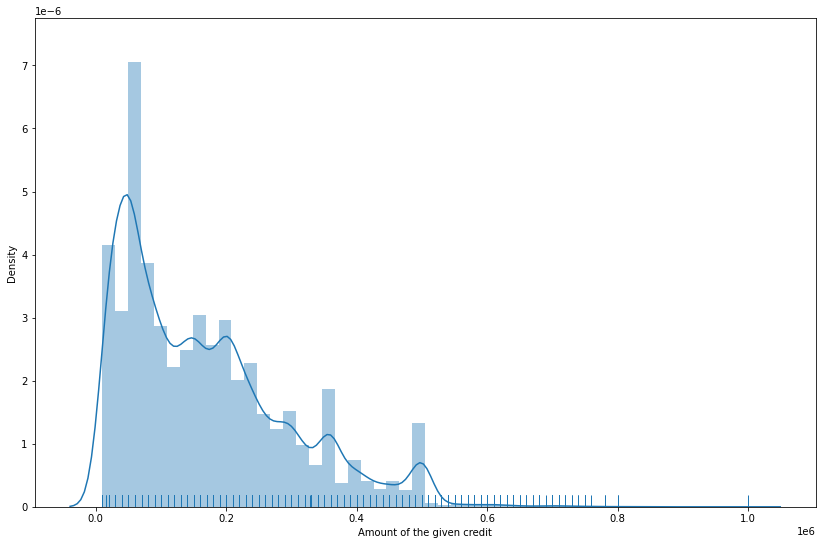

In [88]:
plt.figure(figsize=(14,9))
a=sns.distplot(df['LIMIT_BAL'], kde=True,rug=True, axlabel="Amount of the given credit")
plt.show()

**Joint Plot**

<Figure size 1008x1008 with 0 Axes>

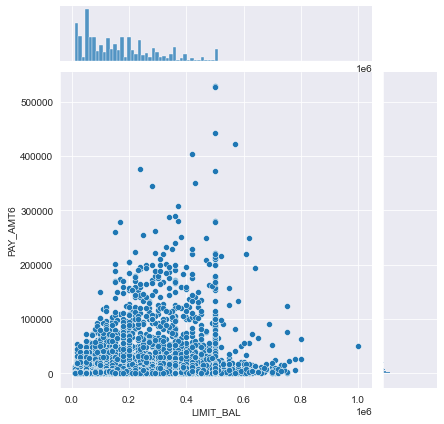

In [24]:
plt.figure(figsize=(14,14))
sns.jointplot(x='LIMIT_BAL', y='PAY_AMT6', data=df)


# ***4) Splitting the DataSet***

***SPLITTING THE DATASET***

In [85]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y , test_size=0.2)

**STANDARDIZATION**

In [87]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [25]:
#f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
#f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
#ax1 = sns.countplot(x="SEX", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[0,0])
#ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=categorical_features, palette="Blues",ax=axes[0,1])
#ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=categorical_features, palette="Blues",ax=axes[0,2])
#ax4 = sns.countplot(x="PAY_0", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,0])
#ax5 = sns.countplot(x="PAY_2", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,1])
#ax6 = sns.countplot(x="PAY_3", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[1,2])
#ax7 = sns.countplot(x="PAY_4", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,0])
#ax8 = sns.countplot(x="PAY_5", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,1])
#ax9 = sns.countplot(x="PAY_6", hue="default payment next month", data=categorical_features, palette="Blues", ax=axes[2,2]);

# ***4) Modeling***

**Logistic Regression**

In [26]:
lr = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [27]:
accuracy_score(y_test , y_pred)

0.8085

<AxesSubplot:>

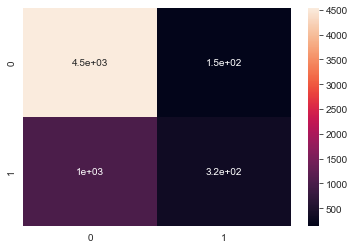

In [28]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

In [29]:
roc_auc_score(y_test , y_pred)

0.6064582231037187

Dropping data from target =0

In [96]:
lr = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

In [97]:
accuracy_score(y_test , y_pred) 

0.8085

<AxesSubplot:>

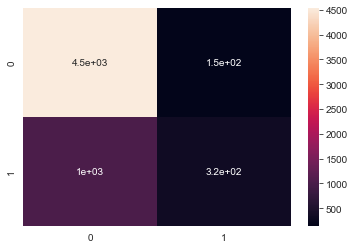

In [98]:
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True)

In [101]:
roc_auc_score(y_test , y_pred) 

0.6064582231037187

**Lasso** 


In [34]:
lasso = LogisticRegression(random_state=0, penalty = 'l1', solver = 'saga').fit(X_train_std, y_train)
y_pred = lasso.predict(X_test_std)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [35]:
accuracy_score(y_test , y_pred) 

0.8085

In [36]:
roc_auc_score(y_test,y_pred)

0.6064582231037187

**KNN**



In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

In [38]:
accuracy_score(y_test , y_pred) 

0.8083333333333333

In [39]:
roc_auc_score(y_test , y_pred)

0.6246970886158213

<AxesSubplot:>

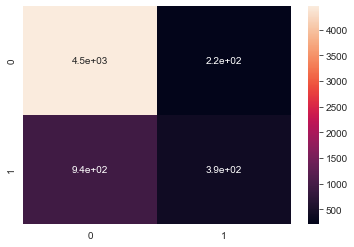

In [40]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Classification Trees**

In [41]:
!pip install  xgboost

In [42]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:52:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
accuracy_score(y_test , y_pred)

0.8133333333333334

<AxesSubplot:>

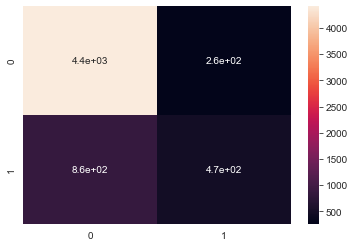

In [44]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

In [45]:
rf = RandomForestClassifier(max_depth=3, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [46]:
accuracy_score(y_test , y_pred)

0.8096666666666666

In [47]:
roc_auc_score(y_test , y_pred)

0.6126030487314208

<AxesSubplot:>

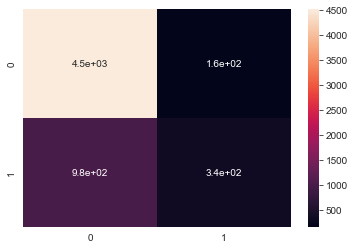

In [48]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Artificial Neural Networks**

In [49]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_std, y_train, epochs=30, batch_size=128,validation_split=0.2)


Epoch 1/30
150/150 [==============================] - 1s 3ms/step - loss: 0.4952 - accuracy: 0.7908 - val_loss: 0.4720 - val_accuracy: 0.8098
Epoch 2/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8191 - val_loss: 0.4667 - val_accuracy: 0.8085
Epoch 3/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8219 - val_loss: 0.4540 - val_accuracy: 0.8108
Epoch 4/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8218 - val_loss: 0.4521 - val_accuracy: 0.8135
Epoch 5/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8235 - val_loss: 0.4518 - val_accuracy: 0.8125
Epoch 6/30
150/150 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8244 - val_loss: 0.4508 - val_accuracy: 0.8127
Epoch 7/30
150/150 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8249 - val_loss: 0.4499 - val_accuracy: 0.8142
Epoch 

In [50]:
y_pred = model.predict(X_test_std)
y_pred = [0 if x<0.5 else 1 for x in y_pred]

In [51]:
accuracy_score(y_test , y_pred)

0.8115

In [52]:
roc_auc_score(y_test , y_pred)

0.6477738281016296

<AxesSubplot:>

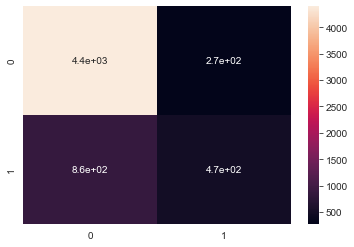

In [53]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Naive Bayesian Classifier**

In [54]:
gb = GaussianNB()
gb.fit(X_train_std, y_train)
y_pred = gb.predict(X_test_std)

In [55]:
accuracy_score(y_test , y_pred)

0.275

In [56]:
roc_auc_score(y_test , y_pred)

0.5264664765167179

In [ ]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Discriminative Analysis**

In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std, y_train)
y_pred = lda.predict(X_test_std)

In [58]:
accuracy_score(y_test , y_pred)

0.8091666666666667

In [59]:
roc_auc_score(y_test , y_pred)

0.6120122636879984

<AxesSubplot:>

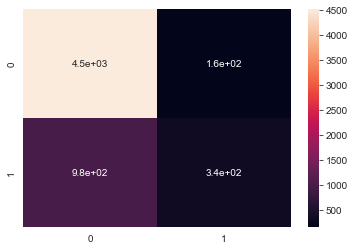

In [60]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**SVM Classifier**

In [61]:
svc = SVC(gamma='auto',probability=True)

In [62]:
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

In [63]:
accuracy_score(y_test , y_pred)

0.816

In [64]:
roc_auc_score(y_test , y_pred)

0.6428387934922856

<AxesSubplot:>

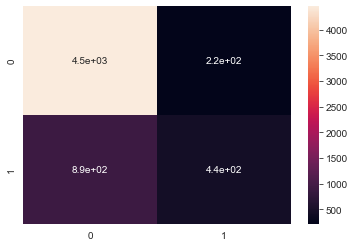

In [65]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Model ensembling**

In [66]:
majority_vote_model = VotingClassifier(estimators=[('lr', lr),('svc', svc), ('lda', lda), ('rf', rf), ('xgb', xgb), ('knn', knn)], voting='hard')

In [67]:
majority_vote_model.fit(X_train_std, y_train)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:59:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma...
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
 

In [68]:
y_pred = majority_vote_model.predict(X_test_std)

In [69]:
accuracy_score(y_test , y_pred)

0.8098333333333333

In [70]:
roc_auc_score(y_test , y_pred)

0.6110912937458707

<AxesSubplot:>

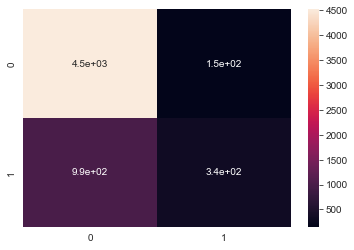

In [71]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Majority vote linear model**

In [73]:
majority_vote_model_linear = VotingClassifier(estimators=[('lr', lr),('svc', svc), ('lda', lda)], voting='hard')
majority_vote_model_linear.fit(X_train_std, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('svc', SVC(gamma='auto', probability=True)),
                             ('lda', LinearDiscriminantAnalysis())])

In [82]:
y_pred = majority_vote_model_linear.predict(X_test_std)


In [83]:
accuracy_score(y_test , y_pred)

0.8083333333333333

In [84]:
roc_auc_score(y_test , y_pred)

0.6087793544050696

<AxesSubplot:>

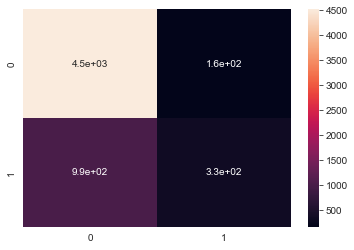

In [85]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Majority vote trees and knn**

In [77]:
majority_vote_model_trees_knn = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('knn', knn)], voting='hard')
majority_vote_model_trees_knn.fit(X_train_std, y_train)


/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:03:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [86]:
y_pred = majority_vote_model_trees_knn.predict(X_test_std)


In [87]:
accuracy_score(y_test , y_pred)

0.8133333333333334

In [88]:
roc_auc_score(y_test , y_pred)

0.6311445232605787

<AxesSubplot:>

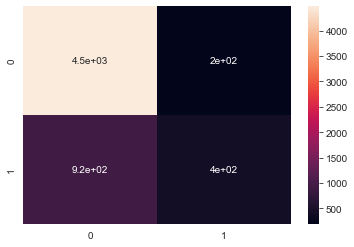

In [89]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Classifying Models from an Error Rate perspective**

**Classifying Models from an Area Ratio perspective**


/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



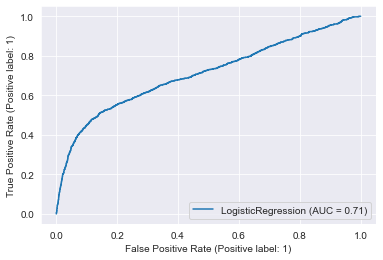

In [90]:
plot_roc_curve(lr, X_test_std, y_test)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



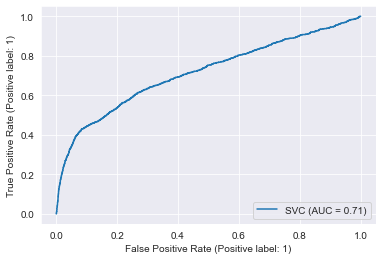

In [91]:
plot_roc_curve(svc, X_test_std, y_test)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



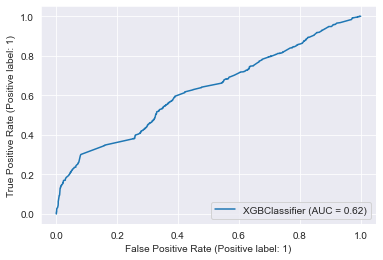

In [92]:
plot_roc_curve(xgb, X_test_std, y_test)

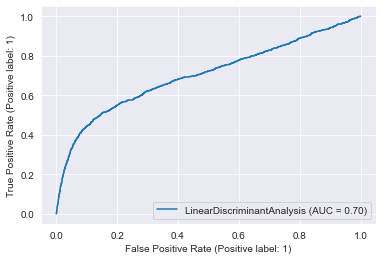

In [94]:
plot_roc_curve(lda, X_test_std, y_test)

### Balancing the target distribution 

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning:

Feature names only support names that are all strings. Got feature names with d

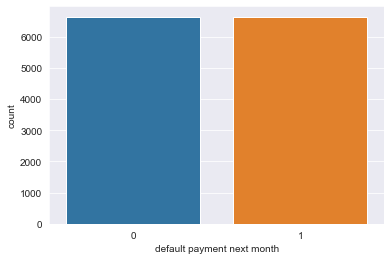

In [102]:
negclass= df[df["default payment next month"]== 1]
posclass = df[df["default payment next month"]== 0].sample(int(len(negclass)))
df1=posclass.append(negclass)
df1

X = df1.drop(columns=['default payment next month'])
y = df1['default payment next month']
sns.countplot(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y , test_size=0.2, shuffle = True)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

**LR**

In [116]:
lr = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



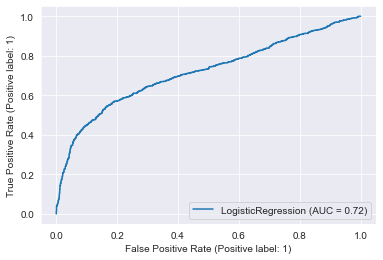

In [117]:
plot_roc_curve(lr, X_test_std, y_test)

In [118]:
roc_auc_score(y_test , y_pred)

0.67383484578858

<AxesSubplot:>

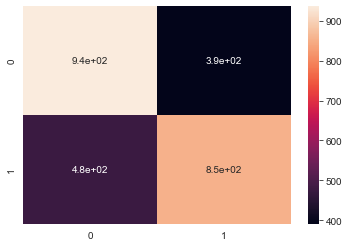

In [119]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**SVC**

In [120]:
svc = SVC(gamma='auto',probability=True)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_test_std)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



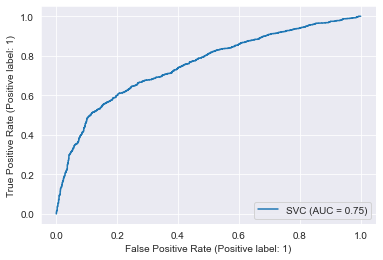

In [121]:
plot_roc_curve(svc, X_test_std, y_test)

In [122]:
roc_auc_score(y_test , y_pred)

0.6968445560690388

<AxesSubplot:>

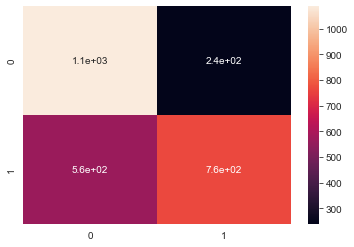

In [123]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)

**Adaboost**

In [124]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)

/Users/ghaliaabassi/miniconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



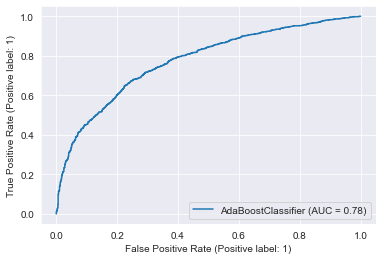

In [125]:
plot_roc_curve(ada, X_test_std, y_test)

In [126]:
roc_auc_score(y_test , y_pred)

0.7006022394022208

<AxesSubplot:>

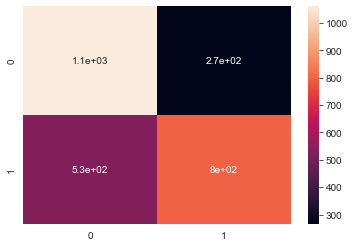

In [127]:
sns.heatmap(confusion_matrix(y_test , y_pred), annot=True)